# Author:
- Student Name: **Yuxuan Wang**
- Student ID: **210985403**

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
all_label = []
all_img = []

# Parse txt label file to np array
with open('Dataset/labels.txt') as f:
    for line in f:
        # Assuming each line is comma-separated
        processed_line = [float(value) for value in line.strip().split(' ')]
        
        # Step 4: Append processed data to list
        all_label.append(processed_line)

data_array = np.array(all_label)

In [6]:
data_array

array([[ 1.      , -0.021162,  0.05953 , -0.039662],
       [ 1.      , -0.057745,  0.083098, -0.094952],
       [ 1.      ,  0.095993,  0.028798,  0.065996],
       ...,
       [ 0.      ,  0.693178,  0.079642,  0.021657],
       [ 0.      ,  0.267035,  0.059341, -0.04135 ],
       [ 0.      , -0.123615,  0.274017,  0.058756]])

In [7]:
# Read image from /Dataset/files
import cv2

test_img = cv2.imread('Dataset/files/file0001.jpg')
# return img info
print("RawImage{} shape: {}".format(1, test_img.shape))


Image1 shape: (192, 178, 3)


## split data into train validation test

In [4]:
import os, shutil
os.makedirs("Dataset/train_smile")
os.makedirs("Dataset/train_not_smile")
os.makedirs("Dataset/val_smile")
os.makedirs("Dataset/val_not_smile")
os.makedirs("Dataset/test_smile")
os.makedirs("Dataset/test_not_smile")

# file(0001-2162).jpg is smile,splite 70% to train, 20% to val, 10% to test
# file(2163-4324).jpg is not smile,splite 70% to train, 20% to val, 10% to test

frames = ["file{:04d}.jpg".format(i) for i in range(1, 2163)]
train_smile = frames[:int(len(frames)*0.7)]
val_smile = frames[int(len(frames)*0.7):int(len(frames)*0.9)]
test_smile = frames[int(len(frames)*0.9):]
for frame in train_smile:
    shutil.copy("Dataset/files/"+frame, "Dataset/train_smile/"+frame)
for frame in val_smile:
    shutil.copy("Dataset/files/"+frame, "Dataset/val_smile/"+frame)
for frame in test_smile:
    shutil.copy("Dataset/files/"+frame, "Dataset/test_smile/"+frame)
    
frames = ["file{:04d}.jpg".format(i) for i in range(2163, 4001)]
train_not_smile = frames[:int(len(frames)*0.7)]
val_not_smile = frames[int(len(frames)*0.7):int(len(frames)*0.9)]
test_not_smile = frames[int(len(frames)*0.9):]
for frame in train_not_smile:
    shutil.copy("Dataset/files/"+frame, "Dataset/train_not_smile/"+frame)
for frame in val_not_smile:
    shutil.copy("Dataset/files/"+frame, "Dataset/val_not_smile/"+frame)
for frame in test_not_smile:
    shutil.copy("Dataset/files/"+frame, "Dataset/test_not_smile/"+frame)


In [7]:
# check the number of images in each folder
print("train_smile: \t\t", len(os.listdir("Dataset/train_smile")))
print("train_not_smile: \t", len(os.listdir("Dataset/train_not_smile")))
print("val_smile: \t\t", len(os.listdir("Dataset/val_smile")))
print("val_not_smile: \t", len(os.listdir("Dataset/val_not_smile")))
print("test_smile: \t", len(os.listdir("Dataset/test_smile")))
print("test_not_smile:\t", len(os.listdir("Dataset/test_not_smile")))


train_smile: 		 1513
train_not_smile: 	 1286
val_smile: 		 432
val_not_smile: 	 368
test_smile: 	 217
test_not_smile:	 184


Smile images:


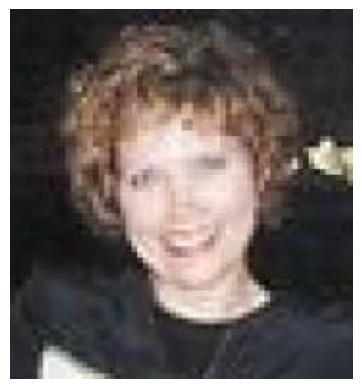

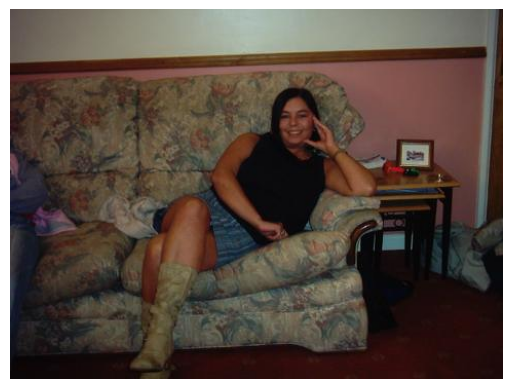

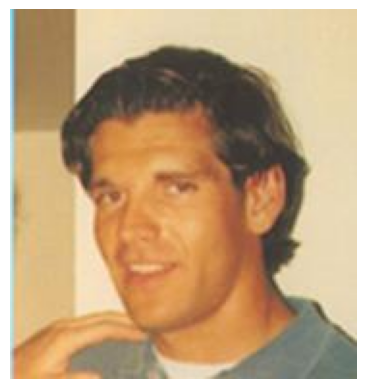

Not smile images:


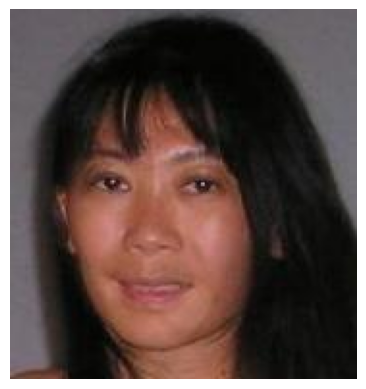

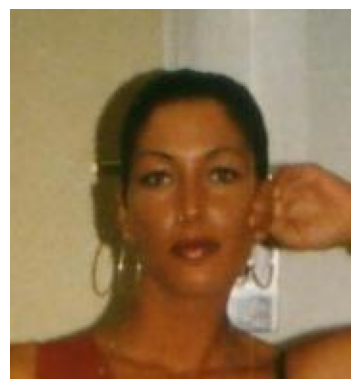

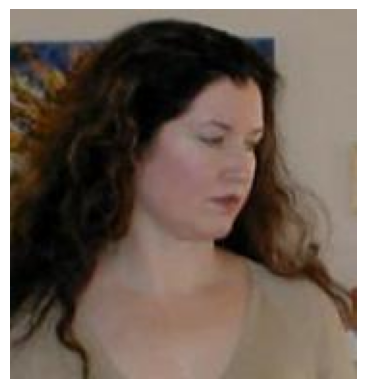

In [11]:
# Display some images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def display_images(folder, num_images):
    images = os.listdir(folder)
    random_images = [os.path.join(folder, image) for image in random.sample(images, num_images)]
    for image in random_images:
        img = mpimg.imread(image)
        plt.imshow(img)
        plt.axis('Off')
        plt.show()
        
print("Smile images:")
display_images("Dataset/train_smile", 3)
print("Not smile images:")
display_images("Dataset/train_not_smile", 3)

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

# 定义自定义数据集类
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        初始化函数
        root_dir (string): 数据集的目录。
        transform (callable, optional): 需要应用在样本上的可选转换。
        """
        self.root_dir = root_dir
        self.transform = transform
        self.images = []
        self.labels = []

        # 加载所有图像和标签
        for label, subdir in enumerate(sorted(os.listdir(root_dir))):
            folder = os.path.join(root_dir, subdir)
            if os.path.isdir(folder):
                for file in os.listdir(folder):
                    if file.lower().endswith("jpg"):
                        self.images.append(os.path.join(folder, file))
                        self.labels.append(label)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = Image.open(self.images[idx])
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# 定义转换
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # 假设单通道，实际情况可能需要调整
])

# 创建数据集
train_dataset = CustomDataset(root_dir='./data/train', transform=transform)
test_dataset = CustomDataset(root_dir='./data/test', transform=transform)

# 创建 DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
